# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [1]:
import json

In [2]:
with open("recipes.json") as f:
    recipes = json.load(f)

In [3]:
print(recipes[0])

{u'cuisine': u'greek', u'id': 10259, u'ingredients': [u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']}


### Составление корпуса

In [5]:
from gensim import corpora, models
import numpy as np

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [6]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [7]:
corpus[0][0]

(0, 1)

In [8]:
print(texts[0])
print(corpus[0])

[u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [31]:
np.random.seed(76543)
# здесь код для построения модели:
lda = models.ldamodel.LdaModel(corpus, num_topics=40, passes=5, id2word=dictionary)

In [32]:
# выводим топы слов
for t, top_words in lda.show_topics(num_topics=10, num_words=10):
    print("Topic", t, ":", top_words, end="\n\n")

Topic 8 : 0.087*"rice" + 0.077*"cooking oil" + 0.067*"salt" + 0.059*"water" + 0.051*"basmati rice" + 0.049*"vinegar" + 0.046*"ginger" + 0.036*"curry leaves" + 0.029*"mint leaves" + 0.023*"red cabbage"

Topic 1 : 0.085*"carrots" + 0.059*"onions" + 0.057*"sauce" + 0.056*"cabbage" + 0.046*"spinach" + 0.039*"beef" + 0.033*"low sodium chicken broth" + 0.033*"water" + 0.029*"firm tofu" + 0.028*"green cabbage"

Topic 13 : 0.086*"sour cream" + 0.056*"salsa" + 0.049*"shredded cheddar cheese" + 0.048*"flour tortillas" + 0.041*"chili powder" + 0.039*"black beans" + 0.034*"green onions" + 0.031*"ground cumin" + 0.026*"corn tortillas" + 0.024*"cheddar cheese"

Topic 19 : 0.135*"curry powder" + 0.071*"frozen peas" + 0.065*"long-grain rice" + 0.053*"sweetened condensed milk" + 0.046*"greek yogurt" + 0.038*"egg whites" + 0.032*"cauliflower" + 0.030*"cardamom pods" + 0.028*"black-eyed peas" + 0.026*"ground cayenne pepper"

Topic 34 : 0.089*"onions" + 0.074*"salt" + 0.059*"garlic" + 0.049*"olive oil" + 

In [33]:
model_topics = lda.show_topics(num_topics=40, num_words=10, formatted=False)
model_topics_dict = {}
for topic in range(40):
    model_topics_dict[topic] = [model_topics[topic][1][e][0] for e in range(10)]

In [34]:
model_topics_dict

{0: [u'cooking spray',
  u'salt',
  u'garlic cloves',
  u'olive oil',
  u'chopped onion',
  u'crushed red pepper',
  u'fat free less sodium chicken broth',
  u'black pepper',
  u'ground black pepper',
  u'water'],
 1: [u'carrots',
  u'onions',
  u'sauce',
  u'cabbage',
  u'spinach',
  u'beef',
  u'low sodium chicken broth',
  u'water',
  u'firm tofu',
  u'green cabbage'],
 2: [u'cracked black pepper',
  u'dry red wine',
  u'shortening',
  u'beef broth',
  u'vegetable oil cooking spray',
  u'grape tomatoes',
  u'cilantro sprigs',
  u'french bread',
  u'dried rosemary',
  u'all-purpose flour'],
 3: [u'potatoes',
  u'oil',
  u'salt',
  u'chickpeas',
  u'onions',
  u'coriander',
  u'pepper',
  u'saffron',
  u'chopped tomatoes',
  u'vegetables'],
 4: [u'green bell pepper',
  u'garlic powder',
  u'cayenne pepper',
  u'salt',
  u'paprika',
  u'onions',
  u'dried thyme',
  u'worcestershire sauce',
  u'onion powder',
  u'ground black pepper'],
 5: [u'ground cumin',
  u'salt',
  u'ground coriand

In [41]:
topics = lda.show_topics(num_topics=40, num_words=10,formatted=False)
list_form = [ ]

for item in topics:
    list_form.append(set([top[0] for top in item[1:][0]]))
    
interested = ["salt", "sugar", "water", "mushrooms", "chicken", "eggs"]

answer = [ ]
for termin in interested:
    cur = 0
    for top in list_form:
        if termin in top:
            cur += 1
    answer.append(cur)
print(answer)

[20, 7, 8, 1, 1, 1]


In [42]:
c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs = answer

In [43]:
c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs

(20, 7, 8, 1, 1, 1)

In [44]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

In [45]:
save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs)

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [51]:
import copy
dictionary2 = copy.deepcopy(dictionary)
dict_size_before = len(dictionary2)

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [52]:
frequent_items = [key for key, value in dictionary2.dfs.iteritems() if value>4000]

In [56]:
frequent_items

[0, 4, 9, 12, 17, 21, 29, 45, 48, 54, 100, 117]

In [53]:
dictionary2.filter_tokens(frequent_items)

In [54]:
dict_size_after = len(dictionary2)

In [55]:
dict_size_before, dict_size_after

(6714, 6702)

In [57]:
corpus2 = [dictionary2.doc2bow(text) for text in texts]

In [59]:
corpus_size_before = 0
corpus_size_after = 0

for document in corpus:
    corpus_size_before += len(document)
for document in corpus2:
    corpus_size_after += len(document)

In [61]:
corpus_size_before, corpus_size_after

(428249, 343665)

In [60]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))

In [62]:
save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after)

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [63]:
np.random.seed(76543)
# здесь код для построения модели:
lda2 = models.ldamodel.LdaModel(corpus2, num_topics=40, passes=5, id2word=dictionary2)

In [67]:
coherence = lda.top_topics(corpus)
coherence2 = lda2.top_topics(corpus2)

In [70]:
coherence = np.array(coherence)[:, -1].mean()
coherence2 = np.array(coherence2)[:, -1].mean()

In [71]:
coherence

-691.77559462613226

In [72]:
coherence2

-752.97097549988052

In [73]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))

In [74]:
save_answers3(coherence, coherence2)

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [77]:
lda2.get_document_topics(corpus2[0])

[(4, 0.12812499999999991),
 (15, 0.32353084838300322),
 (22, 0.27661108248543986),
 (37, 0.15923306913155641)]

Также выведите содержимое переменной *.alpha* второй модели:

In [78]:
lda2.alpha

array([ 0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025])

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [79]:
np.random.seed(76543)
# здесь код для построения модели:
lda3 = models.ldamodel.LdaModel(corpus2, num_topics=40, passes=5, id2word=dictionary2, alpha=1)

In [80]:
lda3.get_document_topics(corpus2[0])

[(0, 0.021286343792953508),
 (1, 0.021298590310099764),
 (2, 0.021320055508571793),
 (3, 0.021282109727077201),
 (4, 0.021276595744680851),
 (5, 0.021496606933716474),
 (6, 0.021292176774168881),
 (7, 0.042559706429162673),
 (8, 0.021276634057457267),
 (9, 0.021276595744680851),
 (10, 0.021574647158752083),
 (11, 0.021287570547940539),
 (12, 0.021277424425023884),
 (13, 0.08409670556774991),
 (14, 0.021290106135531346),
 (15, 0.021695610486780707),
 (16, 0.021284453838081599),
 (17, 0.021280070713102107),
 (18, 0.021340039091641366),
 (19, 0.021278463140557365),
 (20, 0.021276595744752814),
 (21, 0.021334086322766992),
 (22, 0.02128117216039499),
 (23, 0.021394919949490776),
 (24, 0.021288024651372809),
 (25, 0.062709262165435389),
 (26, 0.021292249798166081),
 (27, 0.021292331136060241),
 (28, 0.021307418247128996),
 (29, 0.021434803424634736),
 (30, 0.021432324163326112),
 (31, 0.021282086472031895),
 (32, 0.021325744739054311),
 (33, 0.042881410740644194),
 (34, 0.021276595744680958

In [82]:
count_model2 = 0
count_model3 = 0
for document in corpus2:
    count_model2 += len(lda2.get_document_topics(document, minimum_probability=0.01))
    count_model3 += len(lda3.get_document_topics(document, minimum_probability=0.01))

In [83]:
count_model2, count_model3

(198932, 1590960)

In [84]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))

In [85]:
save_answers4(count_model2, count_model3)

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [99]:
import tqdm

In [105]:
X = []
for document in tqdm.tqdm(corpus2):
    X.append(list(np.array(lda2.get_document_topics(document, minimum_probability=0))[:, 1]))

100%|██████████| 39774/39774 [00:34<00:00, 1145.45it/s]


In [106]:
X = np.array(X)
X.shape

(39774, 40)

In [108]:
y = [doc['cuisine'] for doc in recipes]

In [112]:
cuisines = list(set(y))
cuisines_dict = {}
for i in range(len(cuisines)):
    cuisines_dict[cuisines[i]] = i

In [114]:
y = [cuisines_dict[cuisine] for cuisine in y]

In [118]:
rf = RandomForestClassifier(n_estimators=100)
cv = cross_val_score(rf, X, y, cv = 3)
cv

array([ 0.55756616,  0.55660306,  0.56308482])

In [119]:
cv.mean()

0.55908468031967451

In [120]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))

In [121]:
save_answers5(cv.mean())

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [123]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print(w)

In [131]:
generate_recipe(lda2, 5)

long grain white rice
provolone cheese
fresh mozzarella
lean ground beef
kahlúa


### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [132]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [133]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [134]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

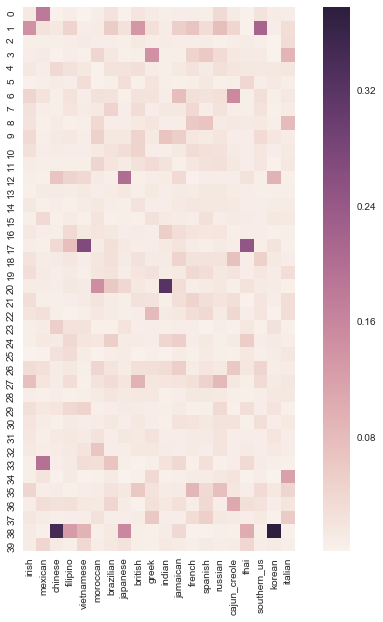

In [135]:
# Визуализируйте матрицу
tc_matrix = compute_topic_cuisine_matrix(lda2, corpus2, recipes)
plot_matrix(tc_matrix)

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 